In [39]:
from pathlib import Path
import json
import os
from collections import Counter
def _load_property2aliases(path):
    # from the property_aliases table
    pid2aliases = {}
    with open(path, 'r') as f:
        header = f.readline()
        assert header.strip().split('\t') == ["alias", "pid"]
        while True:
            line = f.readline()
            if len(line) == 0:
                break
            alias, pid = line.strip().split('\t')
            if pid not in pid2aliases:
                pid2aliases[pid] = []
            pid2aliases[pid].append(alias)
    return pid2aliases
path_prop_alias = Path("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/wikidata_processed/property_aliases/0.tsv")
pid2alias = _load_property2aliases(path_prop_alias)

In [2]:
'''
analyze the distribution of the properties (compare Top K)
'''
from pathlib import Path
import json
import os
from collections import Counter

dir_data = Path("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/wikipedia/text_data/AA")

cnt_property = Counter()
for batch_file in os.listdir(dir_data):
    with open(dir_data / batch_file) as f:
        for line in f:
            obj = json.loads(line)
            entity_rels = obj["entity_rels"]
            for s in entity_rels:
                cnt_property[s.split('\t')[0]] += 1
for k,v in cnt_property.most_common(20):
    print(k,pid2alias[k][0], v)
            

P31 instance of 3119723
P106 occupation 1365062
P17 country 1079233
P131 located in the administrative territorial entity 869070
P21 sex or gender 803184
P27 country of citizenship 781332
P735 given name 752581
P54 member of sports team 730563
P19 place of birth 596430
P47 shares border with 521227
P734 family name 484781
P69 educated at 442763
P161 cast member 440269
P1412 languages spoken, written or signed 416433
P421 located in time zone 375858
P641 sport 367806
P136 genre 363365
P166 award received 362708
P910 topic's main category 335326
P39 position held 334996


In [3]:
dir_linked = Path("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/wikipedia/linked_eav/AA")
cnt_property = Counter()
for batch_file in os.listdir(dir_linked):
    with open(dir_linked / batch_file) as f:
        for line in f:
            obj = json.loads(line)
            for item in obj["linked_entity_rels"]:
                for s in item[2]:
                    cnt_property[s[0][1]] += 1

for k,v in cnt_property.most_common(20):
    print(k,pid2alias[k][0], v)
            

P131 located in the administrative territorial entity 622587
P31 instance of 432949
P361 part of 53642
P17 country 46851
P276 location 46033
P161 cast member 41975
P19 place of birth 37809
P50 author 34638
P57 director 33691
P175 performer 25367
P735 given name 21508
P54 member of sports team 15549
P106 occupation 15519
P22 father 14381
P159 headquarters location 13181
P21 sex or gender 11433
P279 subclass of 10930
P740 location of formation 9403
P179 part of the series 9279
P1376 capital of 8905


In [40]:
dir_linked = Path("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/wikipedia/linked_av/AA")
cnt_property = Counter()
for batch_file in os.listdir(dir_linked):
    with open(dir_linked / batch_file) as f:
        for line in f:
            obj = json.loads(line)
            for item in obj["linked_entity_rels"]:
                for s in item[2]:
                    cnt_property[s[0][1]] += 1

for k,v in cnt_property.most_common(20):
    print(k,pid2alias[k][0], v)

P131 located in the administrative territorial entity 1111666
P31 instance of 603226
P276 location 200553
P19 place of birth 170582
P69 educated at 160522
P17 country 155265
P54 member of sports team 145459
P361 part of 124047
P21 sex or gender 101749
P106 occupation 65476
P26 spouse 59190
P161 cast member 54097
P22 father 51907
P50 author 51526
P57 director 50879
P20 place of death 46779
P175 performer 38780
P102 member of political party 37344
P735 given name 36950
P40 child 30190


In [8]:
# look for entity
dir_linked = Path("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/wikipedia/linked_eav/AA")
cnt_property = Counter()
for batch_file in os.listdir(dir_linked):
    with open(dir_linked / batch_file) as f:
        for line in f:
            obj = json.loads(line)
            if obj["title"] == "Purdue University":
                print(batch_file)
                break

wiki_02


In [40]:

from pathlib import Path
import json
import os
from collections import Counter
from nltk.tokenize import sent_tokenize

dir_data = Path("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/wikipedia/text_data/")
split_list = ["AA", "AB"]

cnt_pages = 0
cnt_has_text = 0
for split in split_list:
    for batch_file in os.listdir(dir_data / split):
        with open(dir_data / split / batch_file) as f:
            for line in f:
                cnt_pages += 1
                obj = json.loads(line)
                if len(obj["text"]) > 0:
                    cnt_has_text += 1
print(cnt_pages, cnt_has_text)


KeyboardInterrupt: 

In [42]:
split

'AB'

In [33]:

from pathlib import Path
import json
import os
from collections import Counter
from nltk.tokenize import sent_tokenize

dir_data = Path("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/wikipedia/text_data/")
split_list = ["AA", "AB"]

cnt_entity_rel = Counter()
cnt_entity_value = Counter()
cnt_sentences = Counter()
cnt_pages = 0
for split in split_list:
    for batch_file in os.listdir(dir_data / split):
        with open(dir_data / split / batch_file) as f:
            for line in f:
                cnt_pages += 1
                obj = json.loads(line)
                cnt_entity_rel[len(obj["entity_rels"])] += 1
                cnt_entity_value[len(obj["entity_values"])] += 1
                # sentences = [x for x in sent_tokenize(obj["text"]) if len(x) >= 15]
                # cnt_sentences[len(sentences)] += 1            

KeyboardInterrupt: 

In [35]:
split

'AB'

In [36]:
for k,v in sorted(cnt_sentences.items()):
    print(k,v)

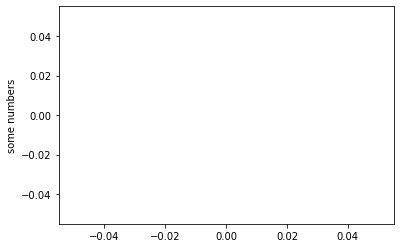

In [37]:
import matplotlib.pyplot as plt
x = []
y = []
for k,v in sorted(cnt_sentences.items())[:200]:
    x.append(k)
    y.append(v)
plt.plot(x, y, '.')
plt.ylabel('some numbers')
plt.show()

0 10688
1 303587
2 223848
3 345553
4 362846
5 294086
6 204886
7 170592
8 144350
9 122878
10 111168
11 99764
12 90217
13 79612
14 70196
15 62980
16 54896
17 47578
18 39889
19 33532
20 27859
21 22948
22 19275
23 16212
24 14027
25 12035
26 10521
27 9153
28 7989
29 6946
30 5974
31 5255
32 4685
33 4289
34 3627
35 3460
36 3149
37 2786
38 2534
39 2234
40 1971
41 1796
42 1664
43 1569
44 1421
45 1358
46 1152
47 1037
48 1005
49 940
50 842
51 787
52 738
53 682
54 642
55 590
56 581
57 489
58 447
59 450
60 411
61 410
62 374
63 332
64 310
65 271
66 288
67 259
68 268
69 239
70 237
71 197
72 207
73 187
74 147
75 155
76 163
77 150
78 142
79 142


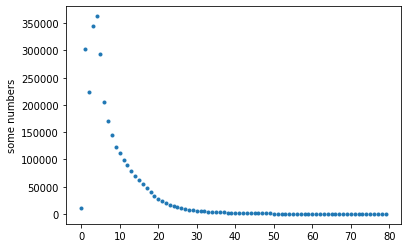

In [52]:
import matplotlib.pyplot as plt
x = []
y = []
for k,v in sorted(cnt_entity_rel.items())[:80]:
    x.append(k)
    y.append(v)
    print(k,v)
plt.plot(x, y, '.')
plt.ylabel('some numbers')
plt.show()

In [49]:
total = sum(list(cnt_entity_rel.values()))
covered = 0
for k,v in sorted(cnt_entity_rel.items()):
    covered += v
    if covered >= total/2:
        print(k,v)
        break

6 204886


0 701481
1 752102
2 636120
3 362432
4 209262
5 119603
6 71676
7 49225
8 29155
9 26132
10 25964
11 20213
12 11481
13 4993
14 3309
15 2714
16 2130
17 9949
18 9421
19 4409
20 1354
21 1106
22 1484
23 993
24 766
25 547
26 517
27 1790
28 8377
29 3062
30 1040
31 630
32 663
33 553
34 521
35 337
36 356
37 317
38 440
39 266
40 253
41 270
42 285
43 256
44 273
45 283
46 322
47 448
48 460
49 345
50 147
51 151
52 134
53 254
54 285
55 139
56 100
57 101
58 89
59 177
60 90
61 82
62 89
63 77
64 69
65 107
66 118
67 154
68 144
69 150
70 148
71 133
72 121
73 100
74 87
75 95
76 72
77 72
78 100
79 74
80 69
81 51
82 47
83 48
84 49
85 58
86 47
87 24
88 36
89 31
90 45
91 45
92 25
93 33
94 26
95 34
96 33
97 28
98 31
99 31


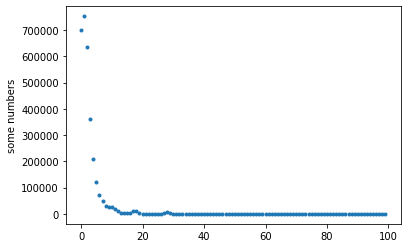

In [39]:
import matplotlib.pyplot as plt
x = []
y = []
for k,v in sorted(cnt_entity_value.items())[:100]:
    x.append(k)
    y.append(v)
    print(k,v)
plt.plot(x, y, '.')
plt.ylabel('some numbers')
plt.show()

In [50]:
total = sum(list(cnt_entity_value.values()))
covered = 0
for k,v in sorted(cnt_entity_value.items()):
    covered += v
    if covered >= total/2:
        print(k,v)
        break

2 636120


In [36]:
# linked sentence distribution
from pathlib import Path
import json
import os
from collections import Counter
dir_linked = Path("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/wikipedia/linked_av/")
split_list = ["AA", "AB"]
cnt_property = Counter()
cnt_entity_rel = Counter()
cnt_entity_value = Counter()
cnt_sentence = Counter()

for split in split_list:
    for batch_file in os.listdir(dir_linked / split):
        with open(dir_linked / split / batch_file) as f:
            for line in f:
                obj = json.loads(line)

                cnt_sentence[len(obj["linked_entity_rels"]) + len(obj["linked_entity_values"])] += 1



In [37]:
for k,v in sorted(cnt_sentence.items())[:10]:
    print(k,v)
print("===")
print("# sentences", sum(int(k)*v for k,v in cnt_sentence.items()))
total = sum(list(cnt_sentence.values()))
print("# pages", total)
covered = 0
for k,v in sorted(cnt_sentence.items())[:10]:
    covered += v
    if covered >= total*0.5:
        print(k,v)
    if covered >= total*0.8:
        print(k,v)
        break


1 1911886
2 760217
3 326281
4 149589
5 77430
6 44475
7 27585
8 17949
9 12530
10 9246
===
# sentences 6956683
# pages 3375907
1 1911886
2 760217
3 326281
3 326281


# sentences 6956683



1 1911886
2 760217
3 326281
4 149589
4 149589
3375907


In [2]:
from pathlib import Path
import json
import os
from collections import Counter
from nltk.tokenize import sent_tokenize

dir_data = Path("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/wikipedia/text_data/")
split_list = ["AA"]

cnt_sentences = Counter()
for split in split_list:
    for batch_file in os.listdir(dir_data / split)[50:51]:
        print(batch_file)
        with open(dir_data / split / batch_file) as f:
            for line in f:
                obj = json.loads(line)
                _cnt = 0
                for s in sent_tokenize(obj["text"]):
                    if len(s) > 15:
                        _cnt += 1
                cnt_sentences[_cnt] += 1
for k,v in sorted(cnt_sentences.items()):
    print(k,v)

wiki_50
0 11
1 2278
2 1355
3 1175
4 1174
5 1077
6 1100
7 1047
8 997
9 1013
10 881
11 815
12 768
13 779
14 724
15 633
16 627
17 545
18 582
19 489
20 455
21 467
22 412
23 421
24 398
25 374
26 341
27 343
28 275
29 264
30 282
31 258
32 249
33 220
34 211
35 189
36 216
37 216
38 190
39 179
40 160
41 139
42 146
43 120
44 124
45 133
46 107
47 120
48 109
49 125
50 105
51 103
52 96
53 98
54 106
55 62
56 97
57 84
58 63
59 71
60 49
61 57
62 59
63 67
64 70
65 48
66 46
67 48
68 58
69 51
70 49
71 49
72 44
73 41
74 40
75 41
76 30
77 33
78 42
79 31
80 38
81 43
82 29
83 30
84 27
85 28
86 33
87 35
88 20
89 24
90 21
91 23
92 19
93 17
94 24
95 16
96 25
97 23
98 26
99 15
100 19
101 14
102 15
103 19
104 15
105 14
106 8
107 21
108 21
109 17
110 15
111 6
112 17
113 12
114 13
115 13
116 13
117 13
118 9
119 11
120 18
121 8
122 14
123 13
124 11
125 11
126 13
127 9
128 13
129 12
130 9
131 8
132 6
133 8
134 12
135 1
136 9
137 11
138 11
139 7
140 5
141 3
142 7
143 7
144 9
145 3
146 6
147 6
148 6
149 7
150 9
151 5
15